# Desafío 2: Interactuar con la API de Mercado Libre
Palabas mas buscadas en la categoria Celulares:

In [1]:
import requests
from datetime import datetime
import os
import json

hoy = datetime.today()
nombreapi='trends'
region='MLA'
categoria='MLA1051'
formato='json'
aniomes=hoy.strftime('%Y%m')


url=f'https://api.mercadolibre.com/{nombreapi}/{region}/{categoria}'

r = requests.get(url)
a=r.json()

path=nombreapi+formato+aniomes
if not os.path.exists(path):
    os.makedirs(path, exist_ok=True)

with open(path+'/'+nombreapi+categoria+'.'+formato, 'w') as outfile:
    json.dump(a, outfile)

# Desafío 3: Deserializar un JSON


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

file_json='Sellers.json'
file_name='sellers_x_segmento.csv'
hoy = datetime.today()

df_json= pd.read_json(file_json)
df=pd.json_normalize(df_json.body)

df=df[['site_id','id','nickname','points']]
df.columns=['siteId','sellerId','sellerNickname','sellerPoints']

df['segmento']=np.where(df['sellerPoints']<0,'Negativo',np.where(df['sellerPoints']>0,'Positivo','Cero'))

# Tomo los sitios únicos
sites=df['siteId'].unique()

# Tomo los segmentos únicos para separar en carpetas
segments=df['segmento'].unique()

for site in sites:
    df_temp=df[df['siteId']==site]
    for segmento in segments:
        path = site+hoy.strftime('/%Y/%m/%d/')+segmento
        if not os.path.exists(path):
            os.makedirs(path, exist_ok=True)
        df_out=df_temp[df['segmento']==segmento]
        df_out.to_csv(os.path.join(path,file_name),index=False)
        

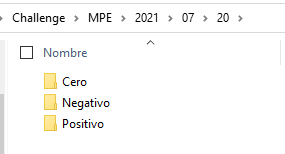

# Desafío 4: Parseo de un Array de Structs en un dataframe


In [3]:
import pandas as pd
import json

file_json='MPE1004.json'

fj=open(file_json)
js=json.load(fj)

df=pd.DataFrame(js['results'])
df=df[[ 'id','sold_quantity','available_quantity']]
df.columns=['itemId','soldQuantity','availableQuantity']
df['rowId']=df.index+1


In [35]:
df=df[['rowId','itemId','soldQuantity','availableQuantity']]
print(df)

    rowId        itemId  soldQuantity  availableQuantity
0       1  MPE433108265             6                  9
1       2  MPE434382765             6                  3
2       3  MPE433853177             3                 17
3       4  MPE419883282            15                 18
4       5  MPE431714651            15                  1
5       6  MPE438492919             0                100
6       7  MPE429448587             0                 50
7       8  MPE439307195             0                  3
8       9  MPE439307251             0                  3
9      10  MPE437503507             0                 10
10     11  MPE438828260             0                  3
11     12  MPE439307426             0                  3
12     13  MPE440306037             0                  1
13     14  MPE439307206             0                  3
14     15  MPE431446248             2                 23
15     16  MPE439307250             0                  3
16     17  MPE439510012        

# Desafío 5: Agregar las visitas al DataFrame con datos de ventas.


In [9]:
#creo el DataFrame de las ventas
df5=df[['itemId','soldQuantity']]
#Cargo las visitas
file_csv='C:/Users/gechevarria/Documents/visits.csv'
df_visits=pd.read_csv(file_csv)

#Uno ambos DataFrame por itemId
df_result = df5.merge(df_visits, on='itemId', how='inner')
#filtro los items sin ventas
df_result = df_result[df_result['soldQuantity'] > 0]


In [10]:
print(df_result)

,itemId,soldQuantity,visits
0,MPE433108265,6,203
1,MPE434382765,6,170
2,MPE433853177,3,1034
3,MPE419883282,15,1772
4,MPE431714651,15,33
14,MPE431446248,2,2242
21,MPE432990777,1,426
22,MPE440389411,1,158
23,MPE421767433,4,746
25,MPE432439269,2,42


# Desafío 6: Agregar métricas a un DataFrame.


In [20]:
df6=df_result
df6['conversionRate']=df6['soldQuantity']/df6['visits']
df6['conversionRanking']=df6['conversionRate'].rank(ascending=False).astype(int)
df6.sort_values('conversionRanking', ascending=True, inplace=True)


In [21]:
print(df6)

,itemId,soldQuantity,visits,conversionRate,conversionRanking
4,MPE431714651,15,33,0.454545,1
33,MPE432291284,2,6,0.333333,2
37,MPE427140390,10,81,0.123457,3
25,MPE432439269,2,42,0.047619,4
1,MPE434382765,6,170,0.035294,5
0,MPE433108265,6,203,0.029557,6
35,MPE433252062,2,92,0.021739,7
32,MPE433933924,1,49,0.020408,8
27,MPE430002527,1,60,0.016667,9
34,MPE432728801,1,68,0.014706,10


# Desafío 7: Porcentaje de Stock


In [33]:
df7=df[[ 'itemId','availableQuantity']].copy()
df7['stockPercentage']=(df7['availableQuantity']/df7['availableQuantity'].sum())*100
df7['stockPercentage']=df7['stockPercentage'].round(2)
df7.sort_values('stockPercentage', ascending=False, inplace=True)


In [34]:
print(df7)

,itemId,availableQuantity,stockPercentage
38,MPE433046443,999,70.30
36,MPE436649728,100,7.04
5,MPE438492919,100,7.04
6,MPE429448587,50,3.52
14,MPE431446248,23,1.62
3,MPE419883282,18,1.27
2,MPE433853177,17,1.20
23,MPE421767433,11,0.77
29,MPE432202936,10,0.70
9,MPE437503507,10,0.70


# Desafío 8: Paths 1


In [2]:
def generateMonthlyPathList(year, month, day):
    
    lista_dias = []
    path = 'http://challenge_path_1/'
    for days in range(1,int(day)+1): # Recorro una lista de los días desde el 1eo al dia indicado mas 1 para incluirlo en el resultado
        lista_dias.append(path+year+'/'+month+'/{:02}/'.format(days))
    return lista_dias

In [3]:
generateMonthlyPathList("2021", "07", "11")

['http://challenge_path_1/2021/07/01/',
 'http://challenge_path_1/2021/07/02/',
 'http://challenge_path_1/2021/07/03/',
 'http://challenge_path_1/2021/07/04/',
 'http://challenge_path_1/2021/07/05/',
 'http://challenge_path_1/2021/07/06/',
 'http://challenge_path_1/2021/07/07/',
 'http://challenge_path_1/2021/07/08/',
 'http://challenge_path_1/2021/07/09/',
 'http://challenge_path_1/2021/07/10/',
 'http://challenge_path_1/2021/07/11/']

# Desafío 9: Paths 2


In [4]:
def generateLastDaysPaths(dia, days):
    from datetime import datetime
    from dateutil.relativedelta import relativedelta
    dia=datetime.strptime(dia,'%Y%m%d')
    lista_dias = []
    path = 'http://challenge_path_2/'
    dia1=dia-relativedelta(days=days-1)
    lista = [dia1 + relativedelta(days=days) for days in range((dia - dia1).days + 1)]
    for dias in lista:
        lista_dias.append(path+dias.strftime('%Y/%m/%d')+'/')
    
    return lista_dias

In [5]:
generateLastDaysPaths("20210710", 15)

['http://challenge_path_2/2021/06/26/',
 'http://challenge_path_2/2021/06/27/',
 'http://challenge_path_2/2021/06/28/',
 'http://challenge_path_2/2021/06/29/',
 'http://challenge_path_2/2021/06/30/',
 'http://challenge_path_2/2021/07/01/',
 'http://challenge_path_2/2021/07/02/',
 'http://challenge_path_2/2021/07/03/',
 'http://challenge_path_2/2021/07/04/',
 'http://challenge_path_2/2021/07/05/',
 'http://challenge_path_2/2021/07/06/',
 'http://challenge_path_2/2021/07/07/',
 'http://challenge_path_2/2021/07/08/',
 'http://challenge_path_2/2021/07/09/',
 'http://challenge_path_2/2021/07/10/']

# Desafío 11: SQL 1


# Desafío 12: SQL 2


# 